# Exploration d'Ensembles de Données d'Imagerie Cérébrale

Dans la recherche et les applications réelles, il est courant de travailler avec des ensembles de données (`datasets`) volumineux, contenant de nombreuses images. Pour assurer la reproductibilité et la standardisation, ces ensembles sont souvent organisés selon des conventions spécifiques, telles que la **BIDS (Brain Imaging Data Structure)** en neuroimagerie.

Ce chapitre présente les étapes fondamentales pour explorer un ensemble de données BIDS : l'identification des fichiers, le chargement des données, l'inspection des métadonnées et la visualisation des images.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import nibabel as nib # Bibliothèque pour la lecture des fichiers NIfTI
import json # Pour lire les fichiers JSON de métadonnées


---

## 1. Exploration de la structure des fichiers

La première étape consiste à comprendre l'organisation des fichiers au sein de l'ensemble de données. Nous utiliserons `pathlib` pour lister les fichiers d'images (`.nii.gz`) et les fichiers de métadonnées (`.json`). La structure BIDS organise typiquement les données par `sujet` (sub), `session` (ses) et `type de modalité` (anat, func, dwi).

In [10]:
# Définir le chemin vers le dossier des données BIDS
bids_root = Path('data/bids')

# Lister tous les fichiers d'images NIfTI
nifti_files = sorted(list(bids_root.glob('**/*.nii.gz')))
print("Fichiers NIfTI trouvés :")
for f in nifti_files:
    print(f"- {f.relative_to(bids_root)}")

# Lister tous les fichiers JSON de métadonnées
json_files = sorted(list(bids_root.glob('**/*.json')))
print("Fichiers JSON trouvés :")
for f in json_files:
    print(f"- {f.relative_to(bids_root)}")


Fichiers NIfTI trouvés :
- anat/sub-X_ses-Y_T1w.nii.gz
- anat/sub-X_ses-Y_T2star.nii.gz
- anat/sub-X_ses-Y_T2w.nii.gz
- anat/sub-X_ses-Y_acq-TOF_angio.nii.gz
- anat/sub-X_ses-Y_acq-TSE_T2w.nii.gz
- dwi/sub-X_ses-Y_run-01_dwi.nii.gz
- dwi/sub-X_ses-Y_run-01_dwi_mask.nii.gz
- dwi/sub-X_ses-Y_run-02_dwi.nii.gz
- dwi/sub-X_ses-Y_run-02_dwi_mask.nii.gz
- func/sub-X_ses-Y_task-rest_run-01_bold.nii.gz
- func/sub-X_ses-Y_task-rest_run-02_bold.nii.gz
- swi/sub-X_ses-Y_minIP.nii.gz
- swi/sub-X_ses-Y_swi.nii.gz
Fichiers JSON trouvés :
- anat/sub-X_ses-Y_T1w.json
- anat/sub-X_ses-Y_T2star.json
- anat/sub-X_ses-Y_T2w.json
- anat/sub-X_ses-Y_acq-TOF_angio.json
- anat/sub-X_ses-Y_acq-TSE_T2w.json
- dataset_description.json
- dwi/sub-X_ses-Y_run-01_dwi.json
- dwi/sub-X_ses-Y_run-02_dwi.json
- func/sub-X_ses-Y_task-rest_run-01_bold.json
- func/sub-X_ses-Y_task-rest_run-02_bold.json
- swi/sub-X_ses-Y_minIP.json
- swi/sub-X_ses-Y_swi.json


---

## 2. Chargement et inspection des données d'image

Nous allons charger une image NIfTI spécifique et inspecter ses propriétés, telles que sa forme, son type de données et ses dimensions.

In [11]:
# Choisir un fichier NIfTI à charger (par exemple, le premier de la liste)
if nifti_files:
    image_path = nifti_files[0]
    print(f"Chargement de l'image : {image_path.relative_to(bids_root)}")
    
    # Charger l'image avec nibabel
    img = nib.load(image_path)
    data_img = img.get_fdata() # Obtenir les données de l'image sous forme de tableau NumPy

    print(f"Forme (shape) de l'image : {data_img.shape}")
    print(f"Type de données (dtype) : {data_img.dtype}")
    print(f"Dimensions (ndim) : {data_img.ndim}")
    print(f"Valeur minimale des voxels : {np.min(data_img)}")
    print(f"Valeur maximale des voxels : {np.max(data_img)}")
else:
    print("Aucun fichier NIfTI trouvé pour le chargement.")


Chargement de l'image : anat/sub-X_ses-Y_T1w.nii.gz
Forme (shape) de l'image : (176, 256, 256)
Type de données (dtype) : float64
Dimensions (ndim) : 3
Valeur minimale des voxels : 0.0
Valeur maximale des voxels : 718.0


---

## 3. Visualisation d'une coupe d'image

Les images 3D (comme les IRM) sont souvent visualisées en affichant des coupes transversales. Nous pouvons extraire une coupe spécifique (par exemple, au milieu de l'une des dimensions) et l'afficher avec Matplotlib.

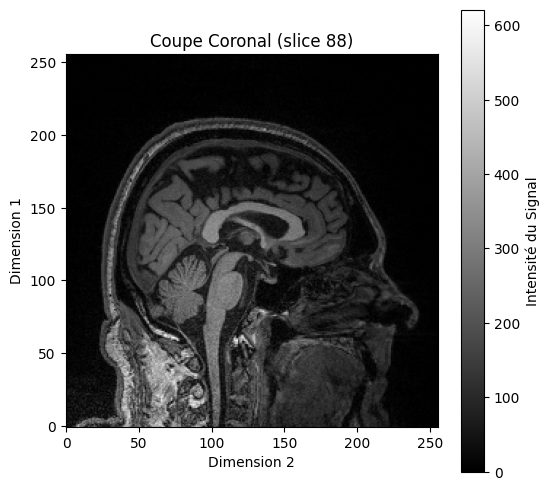

In [12]:

# Choisir une coupe au milieu de la première dimension
slice_idx = data_img.shape[0] // 2
image_slice = data_img[slice_idx, :, :]

plt.figure(figsize=(6, 6))
plt.imshow(image_slice.T, cmap='gray', origin='lower') # .T pour transposer, origin='lower' pour l'orientation
plt.title(f"Coupe Coronal (slice {slice_idx})")
plt.xlabel("Dimension 2")
plt.ylabel("Dimension 1")
plt.colorbar(label="Intensité du Signal")
plt.axis('on')
plt.show()